# importing required libraries 

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# importing the dataset

In [3]:
data1 = pd.read_csv('D:/Assessment_Data/campaign_descriptions.csv')
data2 = pd.read_csv('D:/Assessment_Data/campaigns.csv')
data3 = pd.read_csv('D:/Assessment_Data/coupon_redemptions.csv')
data4 = pd.read_csv('D:/Assessment_Data/coupons.csv')
data5 = pd.read_csv('D:/Assessment_Data/demographics.csv')
data6 = pd.read_csv('D:/Assessment_Data/products.csv')
data7 = pd.read_csv('D:/Assessment_Data/promotions.csv')
data8 = pd.read_csv('D:/Assessment_Data/transactions.csv')

In [14]:
data2.head()

,campaign_id,household_id
0,1,105
1,1,1238
2,1,1258
3,1,1483
4,1,2200


# merging datasets

In [4]:
campaigns_merged = data2.merge(data1, on='campaign_id')
coupon_redemptions_merged = data3.merge(data5, on='household_id')
transactions_merged = data8.merge(data6, on='product_id')
promotions_merged = data7.merge(data6, on='product_id')

In [20]:
campaigns_merged = campaigns_merged.drop_duplicates()
campaigns_merged.head()

,campaign_id,household_id,campaign_type,start_date,end_date
0,1,105,Type B,2017-03-03,2017-04-09
1,1,1238,Type B,2017-03-03,2017-04-09
2,1,1258,Type B,2017-03-03,2017-04-09
3,1,1483,Type B,2017-03-03,2017-04-09
4,1,2200,Type B,2017-03-03,2017-04-09


In [21]:
coupon_redemptions_merged = coupon_redemptions_merged.drop_duplicates()
coupon_redemptions_merged.head()

,household_id,coupon_upc,campaign_id,redemption_date,age,income,home_ownership,marital_status,household_size,household_comp,kids_count
0,165,53377610033,26,2017-01-03,55-64,35-49K,Homeowner,Married,2,2 Adults No Kids,0
1,165,10000085363,8,2017-05-24,55-64,35-49K,Homeowner,Married,2,2 Adults No Kids,0
2,712,51380041013,26,2017-01-07,65+,50-74K,Homeowner,Married,2,2 Adults No Kids,0
3,712,54300016033,26,2017-01-07,65+,50-74K,Homeowner,Married,2,2 Adults No Kids,0
4,712,10000085426,13,2017-08-12,65+,50-74K,Homeowner,Married,2,2 Adults No Kids,0


In [22]:
transactions_merged = transactions_merged.drop_duplicates()
transactions_merged.head()

,household_id,store_id,basket_id,product_id,quantity,sales_value,retail_disc,coupon_disc,coupon_match_disc,week,transaction_timestamp,manufacturer_id,department,brand,product_category,product_type,package_size,transaction_week,transaction_year
0,900,330,3.119857e+10,1095275.0,1,0.50,0.00,0.0,0.0,1,2017-01-01 06:53:26,2,PASTRY,National,ROLLS,ROLLS: BAGELS,4 OZ,52,2017
1,1276,380,3.119898e+10,1095275.0,2,1.00,0.00,0.0,0.0,1,2017-01-01 17:23:53,2,PASTRY,National,ROLLS,ROLLS: BAGELS,4 OZ,52,2017
2,762,31862,3.122538e+10,1095275.0,1,0.50,0.00,0.0,0.0,2,2017-01-02 07:39:36,2,PASTRY,National,ROLLS,ROLLS: BAGELS,4 OZ,1,2017
3,113,375,3.122564e+10,1095275.0,4,2.00,0.00,0.0,0.0,2,2017-01-02 16:09:18,2,PASTRY,National,ROLLS,ROLLS: BAGELS,4 OZ,1,2017
4,762,31862,3.124239e+10,1095275.0,1,0.25,0.25,0.0,0.0,2,2017-01-03 07:21:27,2,PASTRY,National,ROLLS,ROLLS: BAGELS,4 OZ,1,2017


In [24]:
promotions_merged = promotions_merged.drop_duplicates()
promotions_merged.head()

,product_id,store_id,display_location,mailer_location,week,manufacturer_id,department,brand,product_category,product_type,package_size
0,1000050,316,9,0,1,1046,GROCERY,National,COLD CEREAL,KIDS CEREAL,14.5 OZ
1,1000050,337,3,0,1,1046,GROCERY,National,COLD CEREAL,KIDS CEREAL,14.5 OZ
2,1000050,441,5,0,1,1046,GROCERY,National,COLD CEREAL,KIDS CEREAL,14.5 OZ
3,1000050,337,3,0,2,1046,GROCERY,National,COLD CEREAL,KIDS CEREAL,14.5 OZ
4,1000050,313,3,0,3,1046,GROCERY,National,COLD CEREAL,KIDS CEREAL,14.5 OZ


In [26]:
import plotly.express as px

In [27]:
# Assuming transactions_merged DataFrame is already prepared
# Convert 'transaction_timestamp' to datetime
transactions_merged['transaction_timestamp'] = pd.to_datetime(transactions_merged['transaction_timestamp'])

# Extract the week and year from 'transaction_timestamp'
transactions_merged['transaction_week'] = transactions_merged['transaction_timestamp'].dt.week
transactions_merged['transaction_year'] = transactions_merged['transaction_timestamp'].dt.year


C:\Users\91700\AppData\Local\Temp/ipykernel_16552/2303506963.py:6: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



No handles with labels found to put in legend.


<Figure size 864x720 with 0 Axes>

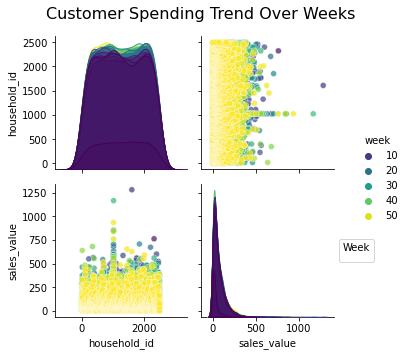

In [77]:

spending_data = transactions_merged[['week', 'household_id', 'sales_value']]

# Group spending data by week and household_id to get total spending per household per week
spending_by_week = spending_data.groupby(['week', 'household_id'])['sales_value'].sum().reset_index()

# Increase the size of the figure (width: 12 inches, height: 10 inches)
plt.figure(figsize=(12, 10))

# Create a modified pair plot using Seaborn
sns.pairplot(spending_by_week, hue='week', palette='viridis', markers='o', plot_kws={'alpha': 0.7})

# Customize title and labels
plt.suptitle('Customer Spending Trend Over Weeks', fontsize=16)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Total Sales Value', fontsize=12)

# Customize ticks and grid
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(linestyle='--', alpha=0.7)

# Move the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Week', title_fontsize=10)

plt.tight_layout(rect=[0, 0, 0.95, 1])  # Adjust the position of the subplots to fit the legend
plt.show()

In [39]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=weekly_sales['transaction_week'], y=weekly_sales['sales_value'],
                         mode='lines+markers',
                         line=dict(color='blue', width=2),
                         marker=dict(size=8, color='red', symbol='circle'),
                         name='Weekly Sales'))

# Customize layout
fig.update_layout(title='Weekly Sales Trend',
                  xaxis_title='Week',
                  yaxis_title='Sales',
                  font=dict(family='Arial', size=12),
                  plot_bgcolor='white',
                  xaxis=dict(showgrid=True, gridcolor='lightgrey'),
                  yaxis=dict(showgrid=True, gridcolor='lightgrey'),
                  hovermode='x unified')

fig.show()

In [81]:
import plotly.graph_objects as go
import plotly.express as px

# Group coupon redemptions by week
coupon_redemption_by_week = coupon_redemptions_merged.groupby('redemption_date')['coupon_upc'].count().reset_index()

# Create a highly modified line plot using Plotly
fig = go.Figure()

# Add the line trace
fig.add_trace(go.Scatter(x=coupon_redemption_by_week['redemption_date'], 
                         y=coupon_redemption_by_week['coupon_upc'], 
                         mode='lines+markers', 
                         line=dict(color='purple', width=2),
                         marker=dict(size=8, color='gold', symbol='circle'),
                         name='Coupon Redemptions'))



# Set title and labels
fig.update_layout(title='Weekly Coupon Redemptions Over Time',
                  xaxis_title='Redemption Date',
                  yaxis_title='Coupon Redemption Count',
                  font=dict(family='Arial', size=12))


# Customize layout
fig.update_layout(plot_bgcolor='white',
                  xaxis=dict(showgrid=True, gridcolor='lightgrey'),
                  yaxis=dict(showgrid=True, gridcolor='lightgrey'),
                  hovermode='x unified')

fig.show()
